# Statements EXPERT

Esta tabla contiene la información de las sentencias.

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'statement__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('statements')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-04 18:43:04.141109 Data cache files found ...
2024-07-04 18:43:04.723309 Data cache files successfully loaded!!
The dataset contains 457483 (42.57%) instances for BEGINNER class and 617277 (57.43%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'statements'
TABLE_FEATURES = ['statement__category', 'statement__parent', 'statement__statement_role', 'statement__first_child_category','statement__second_child_category','statement__third_child_category', 'statement__height', 'statement__depth', 'statement__has_or_else', 'statement__body_size']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (617277, 10)
As we can see the downloaded data contains a total of 617277 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 617277 entries, 374718 to 1050634
Data columns (total 10 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   statement__category               617277 non-null  object 
 1   statement__parent                 617277 non-null  object 
 2   statement__statement_role         617277 non-null  object 
 3   statement__first_child_category   522661 non-null  object 
 4   statement__second_child_category  334840 non-null  object 
 5   statement__third_child_category   8685 non-null    object 
 6   statement__height                 617277 non-null  int64  
 7   statement__depth                  617277 non-null  int64  
 8   statement__has_or_else            109482 non-null  object 
 9   statement__body_size              120542 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 51.8+ MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 7 de tipo objeto.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

statement__category                      0
statement__parent                        0
statement__statement_role                0
statement__first_child_category      94616
statement__second_child_category    282437
statement__third_child_category     608592
statement__height                        0
statement__depth                         0
statement__has_or_else              507795
statement__body_size                496735
dtype: int64

### IMPORTANTE
Los nulos se deben a que esas variables solo son aplicables para ciertas categorias

In [5]:
print_empty_cols(X)

statement__category
-------------------
0 instancias no tienen un valor para la columna statement__category


statement__parent
-----------------
0 instancias no tienen un valor para la columna statement__parent


statement__statement_role
-------------------------
0 instancias no tienen un valor para la columna statement__statement_role


statement__first_child_category
-------------------------------
0 instancias no tienen un valor para la columna statement__first_child_category


statement__second_child_category
--------------------------------
0 instancias no tienen un valor para la columna statement__second_child_category


statement__third_child_category
-------------------------------
0 instancias no tienen un valor para la columna statement__third_child_category


statement__height
-----------------
0 instancias no tienen un valor para la columna statement__height


statement__depth
----------------
0 instancias no tienen un valor para la columna statement__depth


statement__h

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
statement__category,617277,22,AssignmentStmt,283057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__parent,617277,12,MethodDef,166297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__statement_role,617277,20,MethodDefBody,166297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__first_child_category,522661,33,Variable,269841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__second_child_category,334840,35,Call,150927,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__third_child_category,8685,27,Call,4323,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__height,617277.0,NaN,NaN,NaN,3.056472,1.756553,1.0,2.0,3.0,4.0,54.0
statement__depth,617277.0,NaN,NaN,NaN,2.825981,2.077282,0.0,1.0,3.0,4.0,56.0
statement__has_or_else,109482,2,False,83610,NaN,NaN,NaN,NaN,NaN,NaN,NaN
statement__body_size,120542.0,NaN,NaN,NaN,1.965083,2.475685,1.0,1.0,1.0,2.0,276.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "statement__depth": [(0.0, 1.0), (1.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 0.0 max: 82.0
    "statement__height": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 1.0 max: 54.0
    "statement__body_size": [(1.0, 2.0), (2.0, inf)],  # min: 1.0 max: 276
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['statement__depth'], 10))
print(get_statistics(X_copy, ['statement__height'], 10))
print(get_statistics(X_copy, ['statement__body_size'], 10))
print(get_statistics(X_copy, ['statement__category'], 10))
print(get_statistics(X_copy, ['statement__first_child_category'], 10))
print(get_statistics(X_copy, ['statement__second_child_category'], 10))
print(get_statistics(X_copy, ['statement__third_child_category'], 10))
print(get_statistics(X_copy, ['statement__parent'], 10))
print(get_statistics(X_copy, ['statement__statement_role'], 10))
print(get_statistics(X_copy, ['statement__has_or_else'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
statement__depth  count  percentage
       [4.0_inf] 197080   31.927320
       [1.0_3.0) 192425   31.173201
       [3.0_4.0) 139959   22.673613
       [0.0_1.0)  87813   14.225866

statement__height  count  percentage
        [3.0_4.0) 220235   35.678472
        [4.0_inf] 177129   28.695221
        [2.0_3.0) 125780   20.376589
        [0.0_2.0)  94133   15.249718

statement__body_size  count  percentage
             unknown 496735   80.471976
           [1.0_2.0)  74592   12.084040
           [2.0_inf]  45950    7.443984

statement__category  count  percentage
     AssignmentStmt 283057   45.855750
                 If  78311   12.686525
             Return  59601    9.655471
         ImportFrom  52520    8.508336
             Assert  33979    5.504660
             Import  24893    4.032711
                For  21800    3.531640
              Raise  12586    2.038955
               With  10923    1.769546
AnnotatedAssignment  10496    1.700371

statement__first_ch

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (617277, 154)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

In [9]:
#plt.figure(figsize=(12, 8))
#sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 10 variable (1 booleana, 3 numericas, 6 categorica) se hara un analisis detallado

### Variable has_or_else (1/10)
Esta variable es de tipo booleano y representa si ciertas categorias de statements tienen la clausula else. El primer paso es hacer un análisis visual de como se distribuyen los valores de la variable.

<Axes: xlabel='statement__has_or_else', ylabel='Count'>

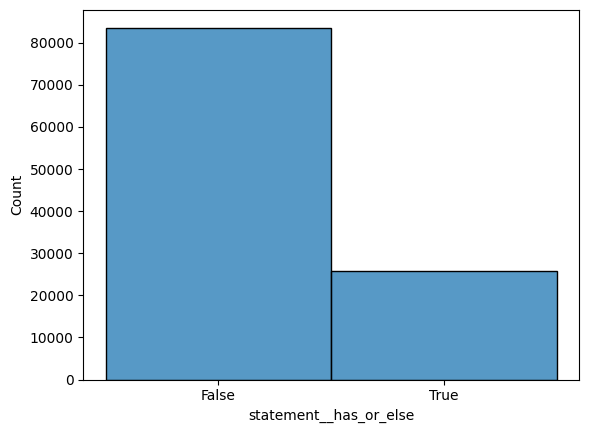

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(full_table['statement__has_or_else'], discrete=True)

In [11]:
num_true_values = len(full_table[full_table['statement__has_or_else'] == True])
num_false_values = len(full_table[full_table['statement__has_or_else'] == False])
std = full_table['statement__has_or_else'].std()
freq_true = len(full_table[full_table['statement__has_or_else'] == True]) / len(full_table['statement__has_or_else'])
freq_false = len(full_table[full_table['statement__has_or_else'] == False]) / len(full_table['statement__has_or_else'])
print(f'La variable has_or_else contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_or_else a False es {freq_false}.')

La variable has_or_else contiene 25872 valores verdaderos y 83610 valores falsos. Y, la desviación típica es de 0.42481845386232653
La frecuencia con la que programa puede tener la variable has_or_else a True es 0.04191311194164046.
La frecuencia con la que programa puede tener la variable has_or_else a False es 0.13544972516390535.


### IMPORTANTE
No suma el 100% debido a los valores nulos

In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(full_table, 'statement__has_or_else', possible_values)

La variable statement__has_or_else contiene 3 valores distintos.
El umbral de outlier es de 0.06666666666666667%
La variable statement__has_or_else toma el valor de None en un 82.26% de los items.
La variable statement__has_or_else toma el valor de False en un 13.54% de los items.
La variable statement__has_or_else toma el valor de True en un 4.191% de los items.


In [13]:
full_table[full_table['statement__has_or_else'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__category,statement__parent,statement__statement_role,statement__first_child_category,statement__second_child_category,statement__third_child_category,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
count,25872,25872,25872,25666,65,0,25872.000000,25872.000000,25872,25872.000000,25872
unique,4,12,18,14,5,0,NaN,NaN,1,NaN,1
top,If,If,IfElseBody,Compare,Call,NaN,NaN,NaN,True,NaN,EXPERT
freq,25575,10757,6898,12509,34,NaN,NaN,NaN,25872,NaN,25872
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.125580,5.870091,NaN,1.703231,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.926733,3.116565,NaN,1.514511,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,4.000000,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,5.000000,NaN,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,7.000000,NaN,2.000000,NaN


### Variable height (2/10)
Esta variable representa la distancia del statement al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 54. Con una media de 3.28.

<Axes: ylabel='statement__height'>

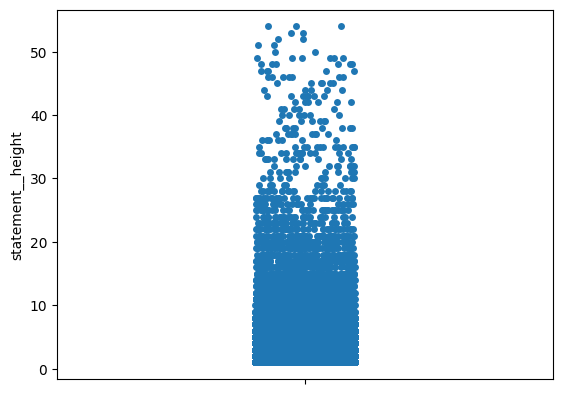

In [14]:
sns.stripplot(X['statement__height'])

In [15]:
print_outliers_for_df_column(X, 'statement__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9334952426406573
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8856648304688655,129.53608651989254]
-3.0IQR: 0 instancias tienen un valor para statement__height inferior a -4.0 (Q1-3*IQR) para statement__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__height inferior a -1.0 (Q1-1.5*IQR) para statement__height. Representando un 0.0% del total de instancias.
+1.5IQR: 9503 instancias tienen un valor para statement__height superior a 7.0 (Q3+1.5*IQR) para statement__height. Representando un 1.54% del total de instancias.
+3.0IQR: 2674 instancias tienen un valor para statement__height superior a 10.0 (Q3-3*IQR) para statement__height. Representando un 0.4332% del total de instancias.
L: 94133 instancias tienen un valor para statement__height inferior a 1.88566483046

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.0 (Con un MC de 81 usamos Tuckey Extremo)

In [16]:
X[X['statement__height'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AsyncFor,statement__category_AsyncWith,statement__category_AugmentedAssignment,statement__category_Break,...,statement__third_child_category_SetComprehension,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_UnaryArithmetic,statement__third_child_category_UnaryNot,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,2674.000000,2674.000000,944.000000,2674.0,2674.000000,2674.000000,2674.0,2674.0,2674.000000,2674.000000,...,2674.0,2674.0,2674.0,2674.0,2674.0,2674.0,2674.0,2674.000000,2674.000000,2674.000000
mean,16.071428,4.779731,1.713983,0.0,0.002992,0.399028,0.0,0.0,0.067689,0.010097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001496,0.124533,0.227001
std,7.447669,5.681708,1.190621,0.0,0.054625,0.489790,0.0,0.0,0.251258,0.099995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038655,0.330250,0.418971
min,11.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,11.000000,2.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
50%,13.000000,3.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
75%,18.000000,5.000000,2.000000,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
max,54.000000,47.000000,9.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


### Variable depth (3/10)
Esta variable representa la distancia desde el statement hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 56. Con una media de 2.92.

<Axes: ylabel='statement__depth'>

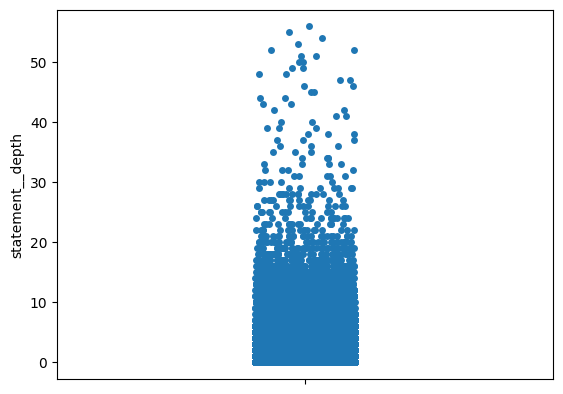

In [17]:
sns.stripplot(X['statement__depth'])

In [18]:
print_outliers_for_df_column(X, 'statement__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.873869763361707
Rango valores atípicos extremos (Tukey): [-8.0,13.0]
Rango valores atípicos leves (Tukey): [-3.5,8.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.7886979758693341,152.34734507594533]
-3.0IQR: 0 instancias tienen un valor para statement__depth inferior a -8.0 (Q1-3*IQR) para statement__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__depth inferior a -3.5 (Q1-1.5*IQR) para statement__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 7082 instancias tienen un valor para statement__depth superior a 8.5 (Q3+1.5*IQR) para statement__depth. Representando un 1.147% del total de instancias.
+3.0IQR: 769 instancias tienen un valor para statement__depth superior a 13.0 (Q3-3*IQR) para statement__depth. Representando un 0.1246% del total de instancias.
L: 87813 instancias tienen un valor para statement__depth inferior a 0.7886979758693341 para

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 13.0 (Con un MC de 92 usamos Tuckey Extremo)

In [19]:
X[X['statement__depth'] > 13].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AsyncFor,statement__category_AsyncWith,statement__category_AugmentedAssignment,statement__category_Break,...,statement__third_child_category_SetComprehension,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_UnaryArithmetic,statement__third_child_category_UnaryNot,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,769.000000,769.000000,688.000000,769.000000,769.0,769.000000,769.0,769.000000,769.0,769.0,...,769.0,769.0,769.0,769.0,769.0,769.0,769.0,769.0,769.000000,769.000000
mean,7.397919,19.338102,4.093023,0.001300,0.0,0.104031,0.0,0.001300,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.271782,0.621587
std,7.869727,7.642236,11.609115,0.036061,0.0,0.305500,0.0,0.036061,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.445167,0.485307
min,1.000000,14.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,3.000000,15.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,4.000000,16.000000,2.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000
75%,9.000000,21.000000,4.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
max,44.000000,56.000000,276.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


### Variable body_size (4/10)
Esta variable representa el número de sentencias o expresiones que se definen dentro del cuerpo de ciertas categorías de sentencias. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 276. Con una media de 2.04.

<Axes: ylabel='statement__body_size'>

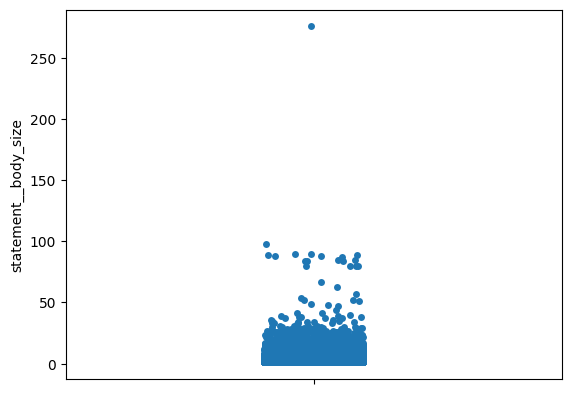

In [20]:
sns.stripplot(X['statement__body_size'])

### IMPORTANTE
Los valor maximo esta muy alejado de los siguientes.

In [21]:
print_outliers_for_df_column(X,'statement__body_size')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9622349544818201
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.948303088212972,72.41490264326242]
-3.0IQR: 0 instancias tienen un valor para statement__body_size inferior a -2.0 (Q1-3*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para statement__body_size inferior a -0.5 (Q1-1.5*IQR) para statement__body_size. Representando un 0.0% del total de instancias.
+1.5IQR: 13443 instancias tienen un valor para statement__body_size superior a 3.5 (Q3+1.5*IQR) para statement__body_size. Representando un 2.178% del total de instancias.
+3.0IQR: 5545 instancias tienen un valor para statement__body_size superior a 5.0 (Q3-3*IQR) para statement__body_size. Representando un 0.8983% del total de instancias.
L: 0 instancias tienen un valor para statement__body_size inf

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 76.5 (Con un MC de 97 usamos U)

In [22]:
X[X['statement__body_size'] > 76.5].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,statement__height,statement__depth,statement__body_size,statement__category_AnnotatedAssignment,statement__category_Assert,statement__category_AssignmentStmt,statement__category_AsyncFor,statement__category_AsyncWith,statement__category_AugmentedAssignment,statement__category_Break,...,statement__third_child_category_SetComprehension,statement__third_child_category_SetLiteral,statement__third_child_category_StringLiteral,statement__third_child_category_Ternary,statement__third_child_category_TupleLiteral,statement__third_child_category_UnaryArithmetic,statement__third_child_category_UnaryNot,statement__third_child_category_Variable,statement__has_or_else_False,statement__has_or_else_True
count,18.000000,18.000000,18.000000,18.0,18.0,18.0,18.0,18.0,18.0,18.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0
mean,1.277778,3.944444,96.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
std,0.574513,6.328946,45.033649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,2.000000,80.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,1.000000,2.000000,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50%,1.000000,2.000000,86.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75%,1.000000,3.000000,89.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,3.000000,29.000000,276.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### IMPORTANTE
Hay que revisar el que tiene 276

### Variable category (5/10)
Esta variable es de tipo categórica y representa el tipo de sentencia.

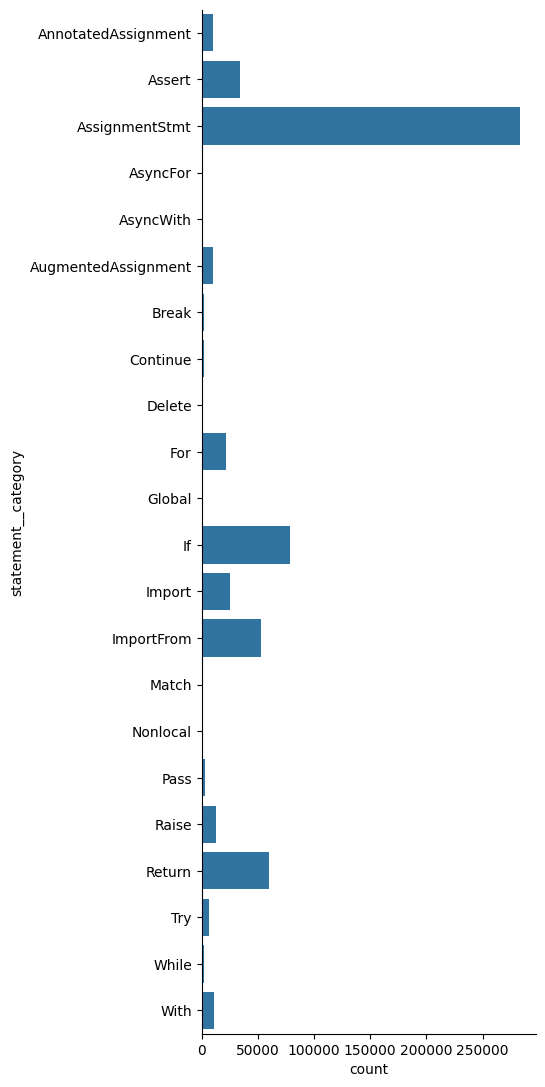

In [23]:
print_categorical_histogram(full_table, 'statement__category', vertical=True)

In [24]:
print_frequency_anal_for_cat_var(full_table, 'statement__category')

La variable statement__category contiene 22 valores distintos.
El umbral de outlier es de 0.009090909090909092%
La variable statement__category toma el valor de AssignmentStmt en un 45.86% de los items.
La variable statement__category toma el valor de If en un 12.69% de los items.
La variable statement__category toma el valor de Return en un 9.655% de los items.
La variable statement__category toma el valor de ImportFrom en un 8.508% de los items.
La variable statement__category toma el valor de Assert en un 5.505% de los items.
La variable statement__category toma el valor de Import en un 4.033% de los items.
La variable statement__category toma el valor de For en un 3.532% de los items.
La variable statement__category toma el valor de Raise en un 2.039% de los items.
La variable statement__category toma el valor de With en un 1.77% de los items.
La variable statement__category toma el valor de AnnotatedAssignment en un 1.7% de los items.
La variable statement__category toma el valor 

In [25]:
print_values_usage_for_cat_var(full_table, 'statement__category', STATEMENT_CATEGORY_VALUES)

La variable statement__category puede tomar 24 valores distintos
	22 (91.67%) valores utilizados
	2 (8.333%) valores NO utilizados
		La variable statement__category nunca toma valor ExceptHandler.
		La variable statement__category nunca toma valor TypeAlias.


### Variable parent (6/10)
Esta variable es de tipo categórica y representa el tipo del padre de la sentencia.

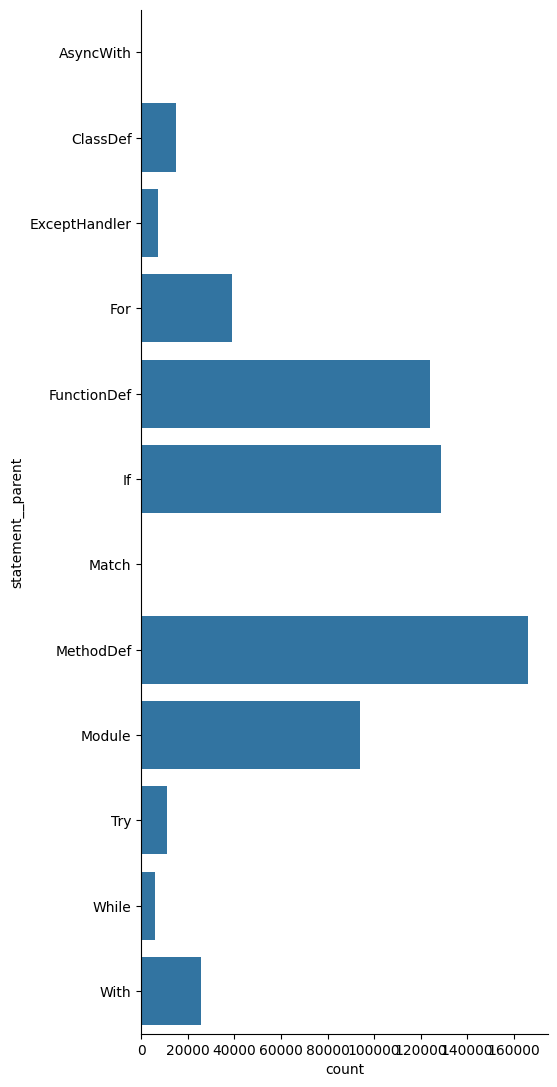

In [26]:
print_categorical_histogram(full_table, 'statement__parent', vertical=True)

In [27]:
print_frequency_anal_for_cat_var(full_table, 'statement__parent')

La variable statement__parent contiene 12 valores distintos.
El umbral de outlier es de 0.016666666666666666%
La variable statement__parent toma el valor de MethodDef en un 26.94% de los items.
La variable statement__parent toma el valor de If en un 20.85% de los items.
La variable statement__parent toma el valor de FunctionDef en un 20.09% de los items.
La variable statement__parent toma el valor de Module en un 15.25% de los items.
La variable statement__parent toma el valor de For en un 6.297% de los items.
La variable statement__parent toma el valor de With en un 4.132% de los items.
La variable statement__parent toma el valor de ClassDef en un 2.385% de los items.
La variable statement__parent toma el valor de Try en un 1.821% de los items.
La variable statement__parent toma el valor de ExceptHandler en un 1.181% de los items.
La variable statement__parent toma el valor de While en un 0.9761% de los items.
La variable statement__parent toma el valor de AsyncWith en un 0.03856% de 

In [28]:
print_values_usage_for_cat_var(full_table, 'statement__parent', STATEMENT_PARENT_VALUES)

La variable statement__parent puede tomar 28 valores distintos
	12 (42.86%) valores utilizados
	16 (57.14%) valores NO utilizados
		La variable statement__parent nunca toma valor Nonlocal.
		La variable statement__parent nunca toma valor AssignmentStmt.
		La variable statement__parent nunca toma valor Assert.
		La variable statement__parent nunca toma valor Return.
		La variable statement__parent nunca toma valor Delete.
		La variable statement__parent nunca toma valor ImportFrom.
		La variable statement__parent nunca toma valor Import.
		La variable statement__parent nunca toma valor AnnotatedAssignment.
		La variable statement__parent nunca toma valor Raise.
		La variable statement__parent nunca toma valor Global.
		La variable statement__parent nunca toma valor Pass.
		La variable statement__parent nunca toma valor Continue.
		La variable statement__parent nunca toma valor TypeAlias.
		La variable statement__parent nunca toma valor AugmentedAssignment.
		La variable statement__paren

### Variable statement_role (7/10)
Esta variable es de tipo categórica y representa el rol que representa la sentencia en su padre.

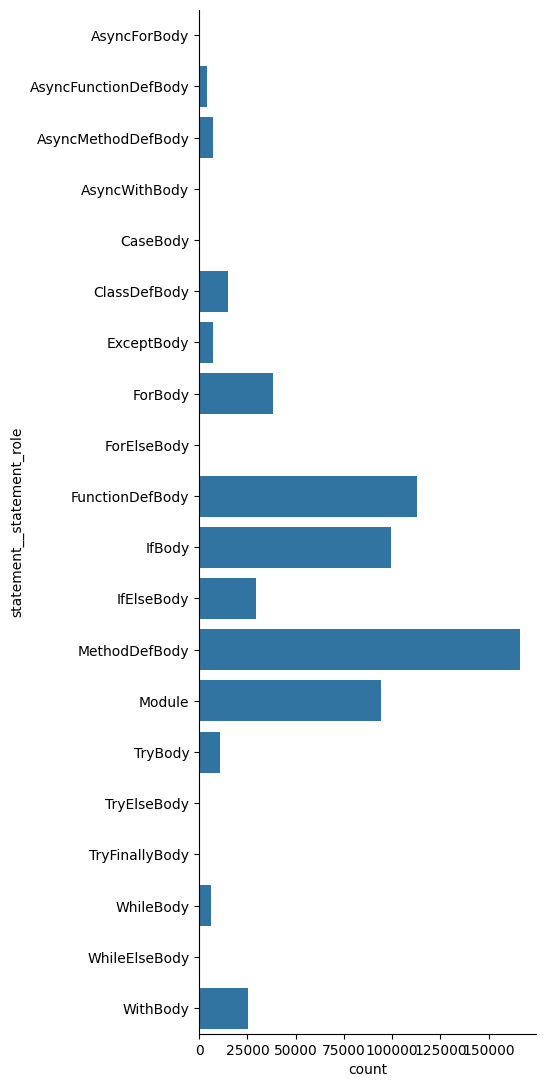

In [29]:
print_categorical_histogram(full_table, 'statement__statement_role', vertical=True)

In [30]:
print_frequency_anal_for_cat_var(full_table, 'statement__statement_role')

La variable statement__statement_role contiene 20 valores distintos.
El umbral de outlier es de 0.01%
La variable statement__statement_role toma el valor de MethodDefBody en un 26.94% de los items.
La variable statement__statement_role toma el valor de FunctionDefBody en un 18.27% de los items.
La variable statement__statement_role toma el valor de IfBody en un 16.08% de los items.
La variable statement__statement_role toma el valor de Module en un 15.25% de los items.
La variable statement__statement_role toma el valor de ForBody en un 6.239% de los items.
La variable statement__statement_role toma el valor de IfElseBody en un 4.779% de los items.
La variable statement__statement_role toma el valor de WithBody en un 4.132% de los items.
La variable statement__statement_role toma el valor de ClassDefBody en un 2.385% de los items.
La variable statement__statement_role toma el valor de TryBody en un 1.728% de los items.
La variable statement__statement_role toma el valor de ExceptBody e

In [31]:
print_values_usage_for_cat_var(full_table, 'statement__statement_role', STATEMENT_ROLE_VALUES)

La variable statement__statement_role puede tomar 23 valores distintos
	20 (86.96%) valores utilizados
	3 (13.04%) valores NO utilizados
		La variable statement__statement_role nunca toma valor TryHandlerStar.
		La variable statement__statement_role nunca toma valor AsyncForElseBody.
		La variable statement__statement_role nunca toma valor TryHandler.


### Variable first_child_category (8/10)
Esta variable es de tipo categorica y representa la categoria del primer hijo de la sentencia.

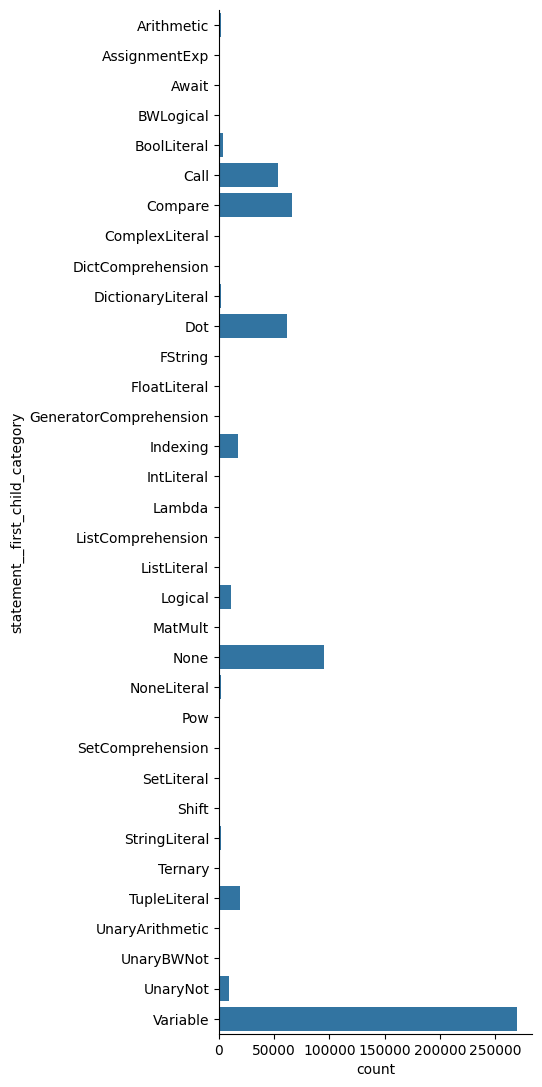

In [32]:
print_categorical_histogram(full_table, 'statement__first_child_category', vertical=True, fillna=True)

In [33]:
print_frequency_anal_for_cat_var(full_table, 'statement__first_child_category')

La variable statement__first_child_category contiene 34 valores distintos.
El umbral de outlier es de 0.0058823529411764705%
La variable statement__first_child_category toma el valor de Variable en un 43.71% de los items.
La variable statement__first_child_category toma el valor de None en un 15.33% de los items.
La variable statement__first_child_category toma el valor de Compare en un 10.65% de los items.
La variable statement__first_child_category toma el valor de Dot en un 10.01% de los items.
La variable statement__first_child_category toma el valor de Call en un 8.714% de los items.
La variable statement__first_child_category toma el valor de TupleLiteral en un 3.115% de los items.
La variable statement__first_child_category toma el valor de Indexing en un 2.738% de los items.
La variable statement__first_child_category toma el valor de Logical en un 1.737% de los items.
La variable statement__first_child_category toma el valor de UnaryNot en un 1.507% de los items.
La variable s

In [34]:
print_values_usage_for_cat_var(full_table, 'statement__first_child_category', STATEMENT_CHILDREN_VALUES)

La variable statement__first_child_category puede tomar 42 valores distintos
	34 (80.95%) valores utilizados
	9 (21.43%) valores NO utilizados
		La variable statement__first_child_category nunca toma valor None.
		La variable statement__first_child_category nunca toma valor FormattedValue.
		La variable statement__first_child_category nunca toma valor Parameter.
		La variable statement__first_child_category nunca toma valor NoneType.
		La variable statement__first_child_category nunca toma valor EllipsisLiteral.
		La variable statement__first_child_category nunca toma valor Yield.
		La variable statement__first_child_category nunca toma valor Slice.
		La variable statement__first_child_category nunca toma valor YieldFrom.
		La variable statement__first_child_category nunca toma valor Star.
La variable statement__first_child_category toma 1 valores desconocidos
		La variable statement__first_child_category toma valor el desconocido None.


### Variable second_child_category (9/10)
Esta variable es de tipo categorica y representa la categoria del segundo hijo de la sentencia.

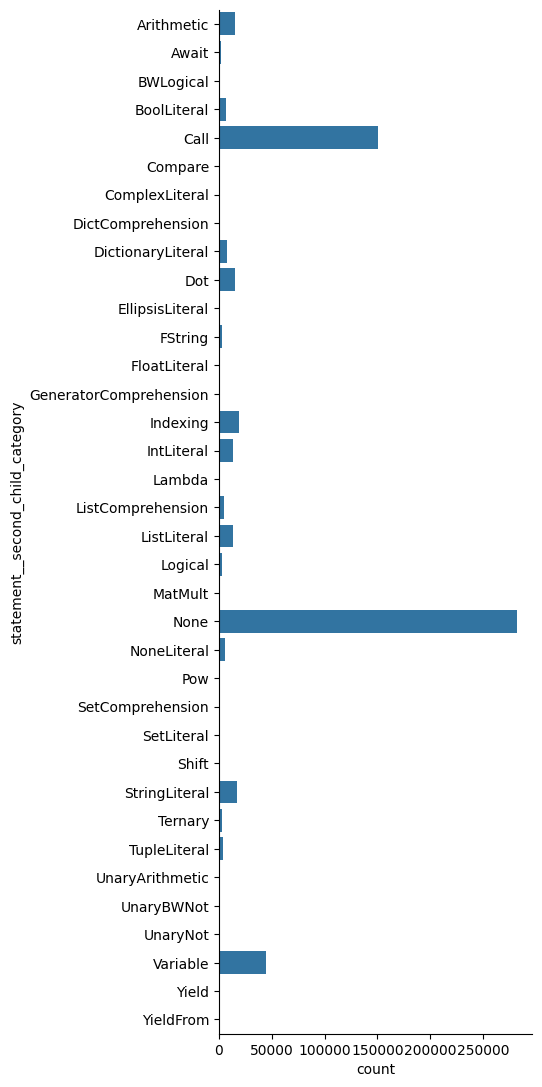

In [35]:
print_categorical_histogram(full_table, 'statement__second_child_category', vertical=True, fillna=True)

In [36]:
print_frequency_anal_for_cat_var(full_table, 'statement__second_child_category')

La variable statement__second_child_category contiene 36 valores distintos.
El umbral de outlier es de 0.005555555555555556%
La variable statement__second_child_category toma el valor de None en un 45.76% de los items.
La variable statement__second_child_category toma el valor de Call en un 24.45% de los items.
La variable statement__second_child_category toma el valor de Variable en un 7.287% de los items.
La variable statement__second_child_category toma el valor de Indexing en un 3.023% de los items.
La variable statement__second_child_category toma el valor de StringLiteral en un 2.772% de los items.
La variable statement__second_child_category toma el valor de Dot en un 2.449% de los items.
La variable statement__second_child_category toma el valor de Arithmetic en un 2.399% de los items.
La variable statement__second_child_category toma el valor de ListLiteral en un 2.234% de los items.
La variable statement__second_child_category toma el valor de IntLiteral en un 2.227% de los i

In [37]:
print_values_usage_for_cat_var(full_table, 'statement__second_child_category', STATEMENT_CHILDREN_VALUES)

La variable statement__second_child_category puede tomar 42 valores distintos
	36 (85.71%) valores utilizados
	7 (16.67%) valores NO utilizados
		La variable statement__second_child_category nunca toma valor None.
		La variable statement__second_child_category nunca toma valor FormattedValue.
		La variable statement__second_child_category nunca toma valor AssignmentExp.
		La variable statement__second_child_category nunca toma valor Parameter.
		La variable statement__second_child_category nunca toma valor NoneType.
		La variable statement__second_child_category nunca toma valor Slice.
		La variable statement__second_child_category nunca toma valor Star.
La variable statement__second_child_category toma 1 valores desconocidos
		La variable statement__second_child_category toma valor el desconocido None.


### Variable third_child_category (10/10)
Esta variable es de tipo categorica y representa la categoria del tercer hijo de la sentencia.

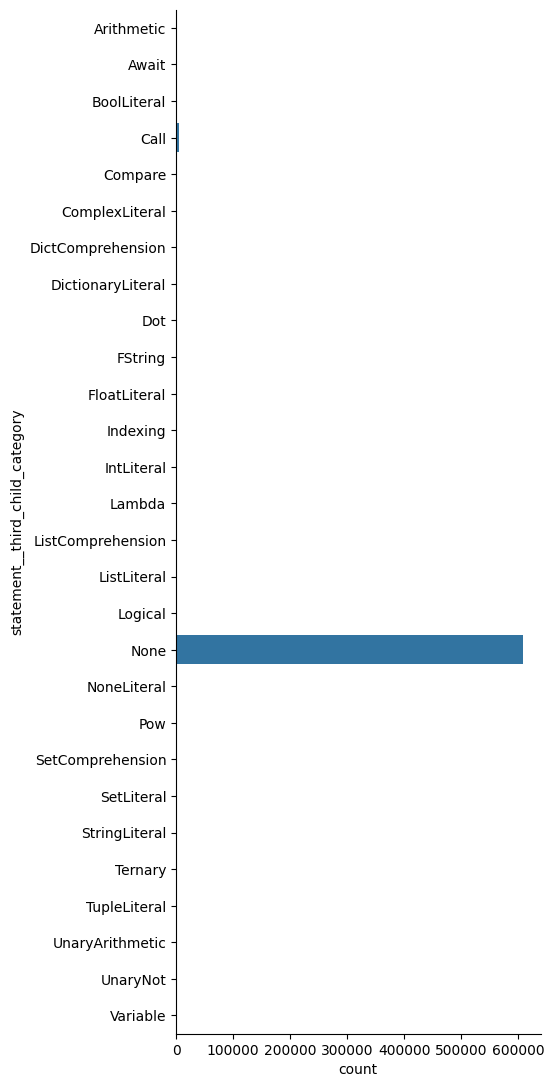

In [38]:
print_categorical_histogram(full_table, 'statement__third_child_category', vertical=True, fillna=True)

In [39]:
print_frequency_anal_for_cat_var(full_table, 'statement__third_child_category')

La variable statement__third_child_category contiene 28 valores distintos.
El umbral de outlier es de 0.0071428571428571435%
La variable statement__third_child_category toma el valor de None en un 98.59% de los items.
La variable statement__third_child_category toma el valor de Call en un 0.7003% de los items.
La variable statement__third_child_category toma el valor de NoneLiteral en un 0.1742% de los items.
La variable statement__third_child_category toma el valor de ListLiteral en un 0.1102% de los items.
La variable statement__third_child_category toma el valor de DictionaryLiteral en un 0.09153% de los items.
La variable statement__third_child_category toma el valor de BoolLiteral en un 0.07031% de los items.
La variable statement__third_child_category toma el valor de Variable en un 0.05524% de los items.
La variable statement__third_child_category toma el valor de StringLiteral en un 0.05249% de los items.
La variable statement__third_child_category toma el valor de IntLiteral e

In [40]:
print_values_usage_for_cat_var(full_table, 'statement__third_child_category', STATEMENT_CHILDREN_VALUES)

La variable statement__third_child_category puede tomar 42 valores distintos
	28 (66.67%) valores utilizados
	15 (35.71%) valores NO utilizados
		La variable statement__third_child_category nunca toma valor None.
		La variable statement__third_child_category nunca toma valor FormattedValue.
		La variable statement__third_child_category nunca toma valor GeneratorComprehension.
		La variable statement__third_child_category nunca toma valor AssignmentExp.
		La variable statement__third_child_category nunca toma valor MatMult.
		La variable statement__third_child_category nunca toma valor BWLogical.
		La variable statement__third_child_category nunca toma valor Parameter.
		La variable statement__third_child_category nunca toma valor Shift.
		La variable statement__third_child_category nunca toma valor UnaryBWNot.
		La variable statement__third_child_category nunca toma valor NoneType.
		La variable statement__third_child_category nunca toma valor EllipsisLiteral.
		La variable statement__

## Multivariate

TODO: isolation forest algorithm

In [41]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
X['statement__body_size'] = X['statement__body_size'].fillna(0) # Fill NaN values with 0
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,statement__category,statement__parent,statement__statement_role,statement__first_child_category,statement__second_child_category,statement__third_child_category,statement__height,statement__depth,statement__has_or_else,statement__body_size,statement__expertise_level
436794,For,With,WithBody,TupleLiteral,Call,None,3,11,False,5.0,EXPERT
436796,For,For,ForBody,TupleLiteral,Call,None,4,10,False,5.0,EXPERT
436806,For,With,WithBody,TupleLiteral,Call,None,3,11,False,5.0,EXPERT
436807,For,For,ForBody,TupleLiteral,Call,None,4,10,False,5.0,EXPERT
437222,For,FunctionDef,FunctionDefBody,TupleLiteral,Call,None,2,13,False,20.0,EXPERT
...,...,...,...,...,...,...,...,...,...,...,...
1042596,For,While,WhileBody,TupleLiteral,Call,None,4,5,False,1.0,EXPERT
1042614,For,While,WhileBody,TupleLiteral,Call,None,4,5,False,1.0,EXPERT
1044280,For,For,ForBody,Variable,Variable,None,5,9,False,6.0,EXPERT
1045689,For,Try,TryBody,TupleLiteral,Call,None,4,4,False,3.0,EXPERT


In [42]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
statement__height,740.0,5.013514,3.457037,1.0,3.0,4.0,5.0,38.0
statement__depth,740.0,6.306757,3.199578,1.0,4.0,6.0,8.0,28.0
statement__body_size,740.0,4.167568,4.145725,0.0,1.0,3.0,6.0,26.0
statement__category_AnnotatedAssignment,740.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__category_Assert,740.0,0.001351,0.036761,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
statement__third_child_category_UnaryArithmetic,740.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__third_child_category_UnaryNot,740.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__third_child_category_Variable,740.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
statement__has_or_else_False,740.0,0.722973,0.447833,0.0,0.0,1.0,1.0,1.0


In [43]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
statement__height,616537.0,3.054123,1.752214,1.0,2.0,3.0,4.0,54.0
statement__depth,616537.0,2.821803,2.072064,0.0,1.0,3.0,4.0,56.0
statement__body_size,616537.0,0.379200,1.329682,0.0,0.0,0.0,0.0,276.0
statement__category_AnnotatedAssignment,616537.0,0.017024,0.129361,0.0,0.0,0.0,0.0,1.0
statement__category_Assert,616537.0,0.055111,0.228197,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
statement__third_child_category_UnaryArithmetic,616537.0,0.000024,0.004932,0.0,0.0,0.0,0.0,1.0
statement__third_child_category_UnaryNot,616537.0,0.000003,0.001801,0.0,0.0,0.0,0.0,1.0
statement__third_child_category_Variable,616537.0,0.000553,0.023511,0.0,0.0,0.0,0.0,1.0
statement__has_or_else_False,616537.0,0.134745,0.341451,0.0,0.0,0.0,0.0,1.0
